### Capstone Project - Credit Risk Analysis


### Introduction 

In today's financial landscape, credit risk assessment plays a crucial role in ensuring the stability and profitability of lending institutions. Identifying potential defaulters before issuing credit can significantly reduce financial losses and improve decision-making processes. This capstone project aims to develop a robust Machine Learning (ML) model to predict whether a debtor will default on their credit payments based on various features of the debtors.


The primary objective of this project is to build a predictive model that accurately determines the likelihood of a debtor defaulting on their credit payments. By leveraging advanced ML techniques, the model will analyze multiple features of debtors, including their financial history, demographic information, and external credit data. This predictive capability will assist financial institutions in making informed lending decisions, mitigating risks, and enhancing overall credit management.


In [217]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import scikitplot as skplt

In [4]:
Maindf = pd.read_csv('acquisition_train.csv')

In [5]:
Maindf.head(5)

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


### 1. Exploratory Data Analysis

In this section, we will cover the exploratory data analysis (EDA) performed on our dataset to uncover underlying patterns, spot anomalies, test hypotheses, and check assumptions. EDA is a crucial step in this project as it would help us to summarize the overall nature of the data as well as create introductory insights for within the data.

In [34]:
# A. Cleaning the Data

In [8]:
#Determining the Shape of the data
Maindf.shape

(45000, 43)

It is seen that the initial dataset has 43 columns and 45,000 data entries.

In [9]:
#Determining the types of data in each feature
Maindf.dtypes

ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                                     

In [10]:
#Obtaining the summary statistics of the data 
Maindf.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,...,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,...,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,...,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,...,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,...,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,...,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,...,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,...,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


In [11]:
Maindf.duplicated().sum()

0

It is therefore seen that there is no duplicated rows of data in the current dataset. 

The next step will then be to check for null values.

In [12]:
#Checking for Null Values
Maindf.isna().sum()

ids                                                     0
target_default                                       3259
score_1                                               562
score_2                                               562
score_3                                               562
score_4                                                 0
score_5                                                 0
score_6                                                 0
risk_rate                                             562
last_amount_borrowed                                29956
last_borrowed_in_months                             29956
credit_limit                                        13800
reason                                                566
income                                                562
facebook_profile                                     4458
state                                                 562
zip                                                   562
channel       

It is evident that several features contain a significant number of null values. From this section onward, we will focus on cleaning the data to ensure the absence of any null values.

In [13]:
#Checking for percentage of null values
print("\nPercentage Of Missing Values:")
print(Maindf.isna().mean().sort_values(ascending = False))


Percentage Of Missing Values:
target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044
n_bankruptcies                                      0.

In [14]:
Maindf.nunique().sort_values()

external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44
n_accounts    

In [15]:
Maindf['external_data_provider_credit_checks_last_2_year'].unique()

array([nan,  0.])

In [16]:
 Maindf['lat_lon'].unique()

array(['(-29.151545708122246, -51.1386461804385)',
       '(-19.687710705798963, -47.94151536525154)',
       '(-28.748023890412284, -51.867279334353995)', ...,
       '(-22.486891256430695, -44.909010639017616)',
       '(-23.888982131800983, -50.645313285616645)',
       '(-23.13900985246712, -52.29465769715389)'], dtype=object)

We can see that the features; 
* 'Target Fraud'
* 'Last amount borrowed',
* 'last borrowed in months'
* 'external_data_provider_credit_checks_last_2_year' &
* 'ok_since'

all have their more than 50% of their data missing. 

Assuming/Interpolating data for the missing values will lead to an incorrect model so these columns will be dropped.

We also see that the **'external_data_provider_credit_checks_last_2_year'** has only one value being 0. Therefore this would not impact the decisions made by the model and would provide more grounds why this feature has to be dropped.

In [15]:
#Creating a copy of the existing raw dataset
MainWdf = Maindf.copy()

In [16]:
#Dropping the high null average columns
MainWdf.drop('external_data_provider_credit_checks_last_2_year', axis =1, inplace=True)
MainWdf.drop('target_fraud', axis =1, inplace=True)
MainWdf.drop('last_amount_borrowed', axis =1, inplace=True)
MainWdf.drop('last_borrowed_in_months', axis =1, inplace=True)
MainWdf.drop('ok_since', axis =1, inplace=True)

The **'lat_lon column"** feature would then be broken into **latitude(lat)** and **longitude(lon)** seperate features and the exist lat_lon feature would be dropped

In [17]:
#Splitting the lat_lon column into latitude and longitude
MainWdf['lat'] = MainWdf['lat_lon'].str.split(' ', expand=True).loc[:,0] 
MainWdf['lat'] = MainWdf['lat'].str.strip('(),')
MainWdf['lat'] = MainWdf['lat'].astype(float)

MainWdf['lon'] = MainWdf['lat_lon'].str.split(' ', expand=True).loc[:,1]
MainWdf['lon'] = MainWdf['lon'].astype(str).str.rstrip(')')
MainWdf['lon'] = MainWdf['lon'].astype(float)

#Dropping the lat_lon value as this data would not be relevant in the creation of a model
MainWdf.drop('lat_lon',  axis =1, inplace=True)

In [18]:
MainWdf.isna().mean().sort_values(ascending = False)

external_data_provider_credit_checks_last_year     0.336089
credit_limit                                       0.306667
n_issues                                           0.256533
facebook_profile                                   0.099067
marketing_channel                                  0.079511
job_name                                           0.074133
target_default                                     0.072422
external_data_provider_email_seen_before           0.049622
lon                                                0.030289
lat                                                0.030289
user_agent                                         0.016044
n_bankruptcies                                     0.015489
n_defaulted_loans                                  0.012756
reason                                             0.012578
state                                              0.012489
score_3                                            0.012489
channel                                 

In [19]:
#Determining the Unique values for each feature in the dataset
MainWdf.nunique().sort_values()

channel                                                1
facebook_profile                                       2
target_default                                         2
external_data_provider_credit_checks_last_year         2
external_data_provider_credit_checks_last_month        4
real_state                                             5
n_defaulted_loans                                      5
email                                                  6
n_bankruptcies                                         6
score_1                                                7
marketing_channel                                      9
shipping_state                                        25
score_2                                               35
n_accounts                                            44
n_issues                                              44
state                                                 50
external_data_provider_email_seen_before              62
risk_rate                      

The column 'Channel' is seen to have just one unique value and would therefore have no effect on our model so it would be dropped.


The columns 'Id' and 'Profile Phone number' would also have no relevance to our dataset, with phone number not providing any intrinsic value to the model and id's being a unique identifier and not providing intrisic value as well, therefore it would be dropped as well.

In [11]:
MainWdf.drop('channel', axis =1, inplace=True)
MainWdf.drop('profile_phone_number', axis =1, inplace=True)
MainWdf.drop('ids', axis =1, inplace=True)

In [12]:
#Check to see existing features with percentage null values
MainWdf.isna().mean().sort_values(ascending = False)

external_data_provider_credit_checks_last_year     0.336089
credit_limit                                       0.306667
n_issues                                           0.256533
facebook_profile                                   0.099067
marketing_channel                                  0.079511
job_name                                           0.074133
target_default                                     0.072422
external_data_provider_email_seen_before           0.049622
lat                                                0.030289
lon                                                0.030289
user_agent                                         0.016044
n_bankruptcies                                     0.015489
n_defaulted_loans                                  0.012756
reason                                             0.012578
income                                             0.012489
score_1                                            0.012489
score_2                                 

In [24]:
#Check to see if all data types fit the data been displayed in each feature
MainWdf.dtypes

target_default                                      object
score_1                                             object
score_2                                             object
score_3                                            float64
score_4                                            float64
score_5                                            float64
score_6                                            float64
risk_rate                                          float64
credit_limit                                       float64
reason                                              object
income                                             float64
facebook_profile                                    object
state                                               object
zip                                                 object
job_name                                            object
real_state                                          object
n_bankruptcies                                     float

The dataset with the remaining features are then checked to see that each respective feature has it's datatype specified to be what it should b, i.e either categorical or numerical.

All infinity values are then replaced to be null values in order to prepare the dataset for more cleaning.

In [22]:
df_num = MainWdf.select_dtypes(exclude='object').columns
df_cat = MainWdf.select_dtypes(include='object').columns

In [23]:
# Checking for infinity values and replace them with NaN
MainWdf.loc[:, df_num] = MainWdf.loc[:, df_num].replace([np.inf, -np.inf], np.nan)


All large values(known as infinite) would then be replaced with null values as there would have no impact on the forecasting model to be created.

An imputer function would then be applied to fill in the categorical features with the **most occuring values** and the Numerical features with the **median values**. The median value is selected in this process to ensure the statistical characteristics of this dataset's features isn't as modofied as possible.





In [24]:
MainWdf.loc[:, df_num] = MainWdf.loc[:, df_num].replace([np.inf, -np.inf], np.nan)

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(MainWdf.loc[:,df_num])
MainWdf.loc[:,df_num] = imputer.transform(MainWdf.loc[:,df_num])

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(MainWdf.loc[:,df_cat])
MainWdf.loc[:,df_cat] = imputer.transform(MainWdf.loc[:,df_cat])



In [25]:
MainWdf.isna().mean().sort_values(ascending = False)

ids                                                0.0
external_data_provider_fraud_score                 0.0
application_time_applied                           0.0
application_time_in_funnel                         0.0
email                                              0.0
external_data_provider_credit_checks_last_month    0.0
external_data_provider_credit_checks_last_year     0.0
external_data_provider_email_seen_before           0.0
external_data_provider_first_name                  0.0
marketing_channel                                  0.0
n_accounts                                         0.0
profile_phone_number                               0.0
reported_income                                    0.0
shipping_state                                     0.0
shipping_zip_code                                  0.0
profile_tags                                       0.0
user_agent                                         0.0
lat                                                0.0
n_issues  

The data is now clean! 

Now, further analysis would be conducted to ensure the dataset is ready and efficiently applied for modelling.

In [223]:
MainWdf.shape

(45000, 39)

In [ ]:
# B. Statistical Exploratory Data Analysis

To begin with, we are going to encode the categorical data to ensure we have a dataset for proper analysis to be conducted on

In [26]:
#Creating a copy of the dataset
df_encoded = MainWdf.copy()

In [28]:
#Extracting the categorical columns i.e the boolean and the object data

categorical_columns = df_encoded.select_dtypes('object').columns
boolean_columns = df_encoded.select_dtypes('bool').columns

# Encoding each categorical column

# Encoding the object data columns
for i in categorical_columns:
  df_encoded[i + '_encoded'] = LabelEncoder().fit_transform(df_encoded[i])
  df_encoded.drop(i, axis=1, inplace=True)

# Encoding the boolean data columns
for i in boolean_columns:
  df_encoded[col + '_encoded'] = LabelEncoder().fit_transform(df_encoded[i])
  df_encoded.drop(i, axis=1, inplace=True)

After encoding the categorical variables, a crucial step in the data exploration phase is to understand the relationships between the independent variables and the dependent variable (Target_default). One effective way to visualize these relationships is by using a heatmap. A heatmap can display the correlation matrix, which shows the pairwise correlation coefficients between variables in the dataset.

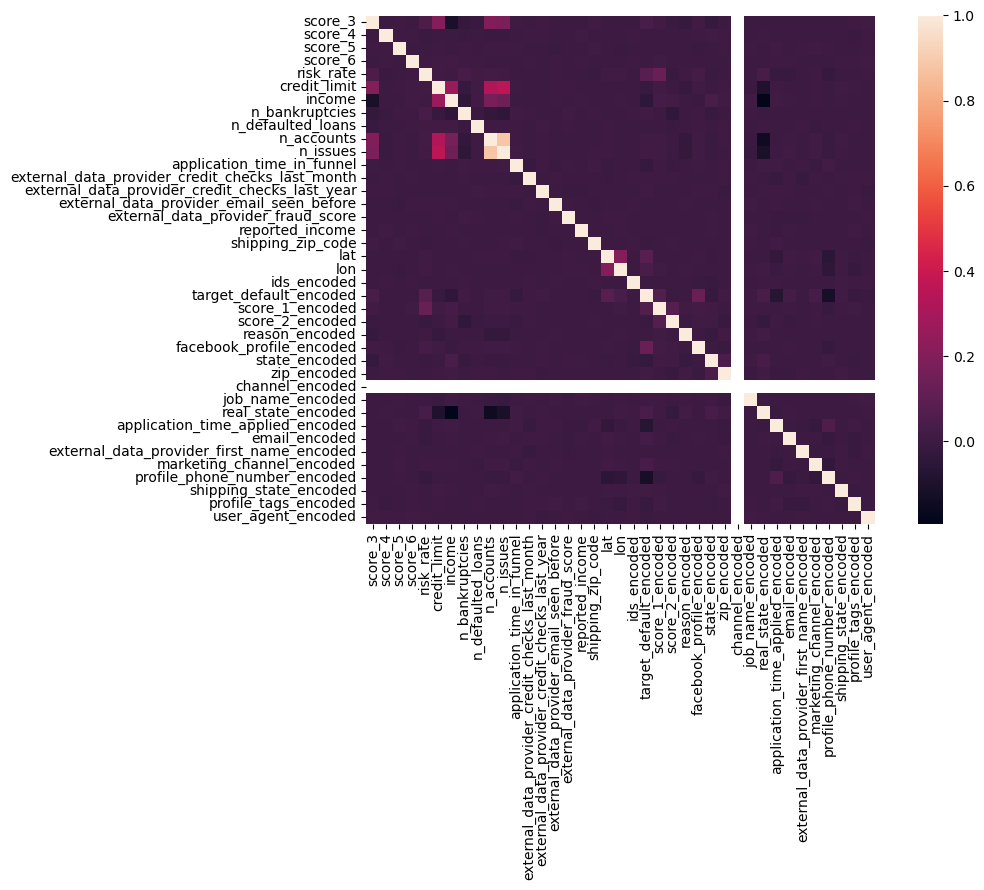

In [29]:
corr = df_encoded.corr()

# plotting the heatmap
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr, square=True, annot=False);
plt.tight_layout()

This shows us the correlation of the each feature on a broader scale. To narrow it down and analyze the highest correlating values to the dependent variable, a heatmap would be shown below:

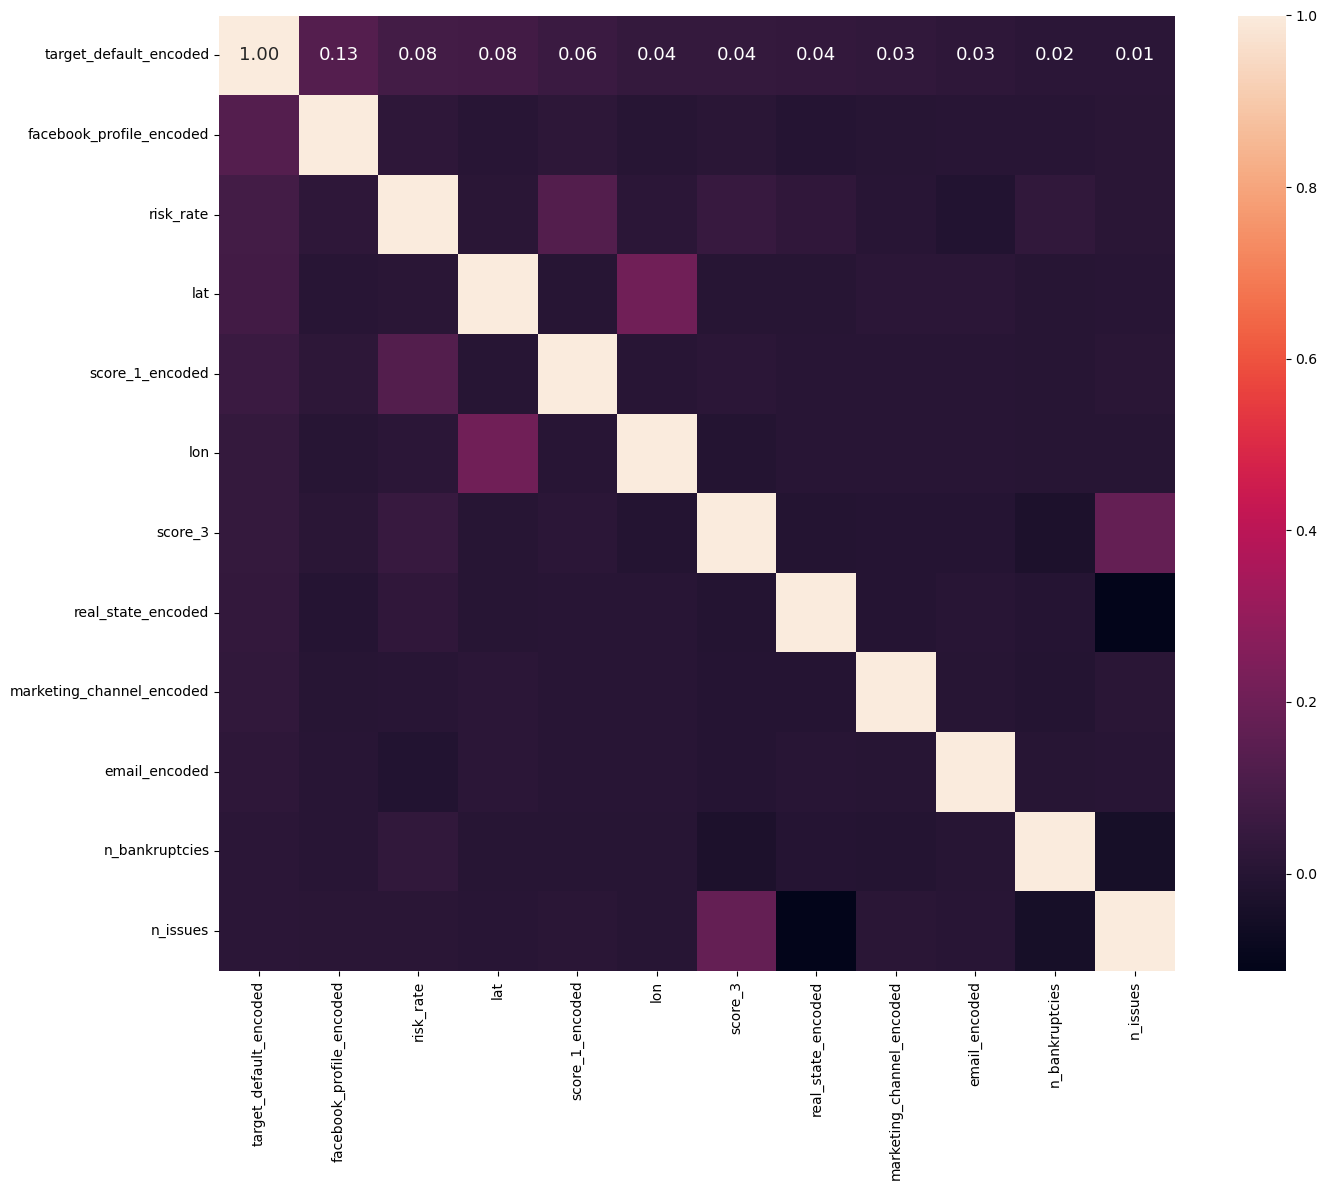

In [30]:
#@title Focused Heatmap
# number of variables to be selected
k = 12

# finding the most correlated variables
cols = corr.nlargest(k, 'target_default_encoded')['target_default_encoded'].index
cm = np.corrcoef(df_encoded[cols].values.T)

# plotting the heatmap
f, ax = plt.subplots(figsize=(15, 12))
#sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()



From the correlation values gotten from the heatmap above, we can see that the dependent variables are weakly correlated to the dependent variable. There are other interesting take away points obtained:


* We see that the highest correlated variable to the dependent variable is seen to be 'facebook_profile_encoded' which is quite interesting as compared to other independent variables.
* Features such as 'risk_rate' and 'score_3'(which is one of the credit scores) has a low correlation with the dependent variable and was expected to have a significant impact to it. It's also seen that only 2 scores out of the 6 scores have a relative significance to the dependent variable as opposed to think all scores would have a high impact on the 'Target_default'
* It's also interesting to note values like 'Marketing Channel' has a higher impact on the dependent variables compared to other features.


Let's explore the relationship between these top features;

/Users/kenna/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/kenna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kenna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kenna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mo

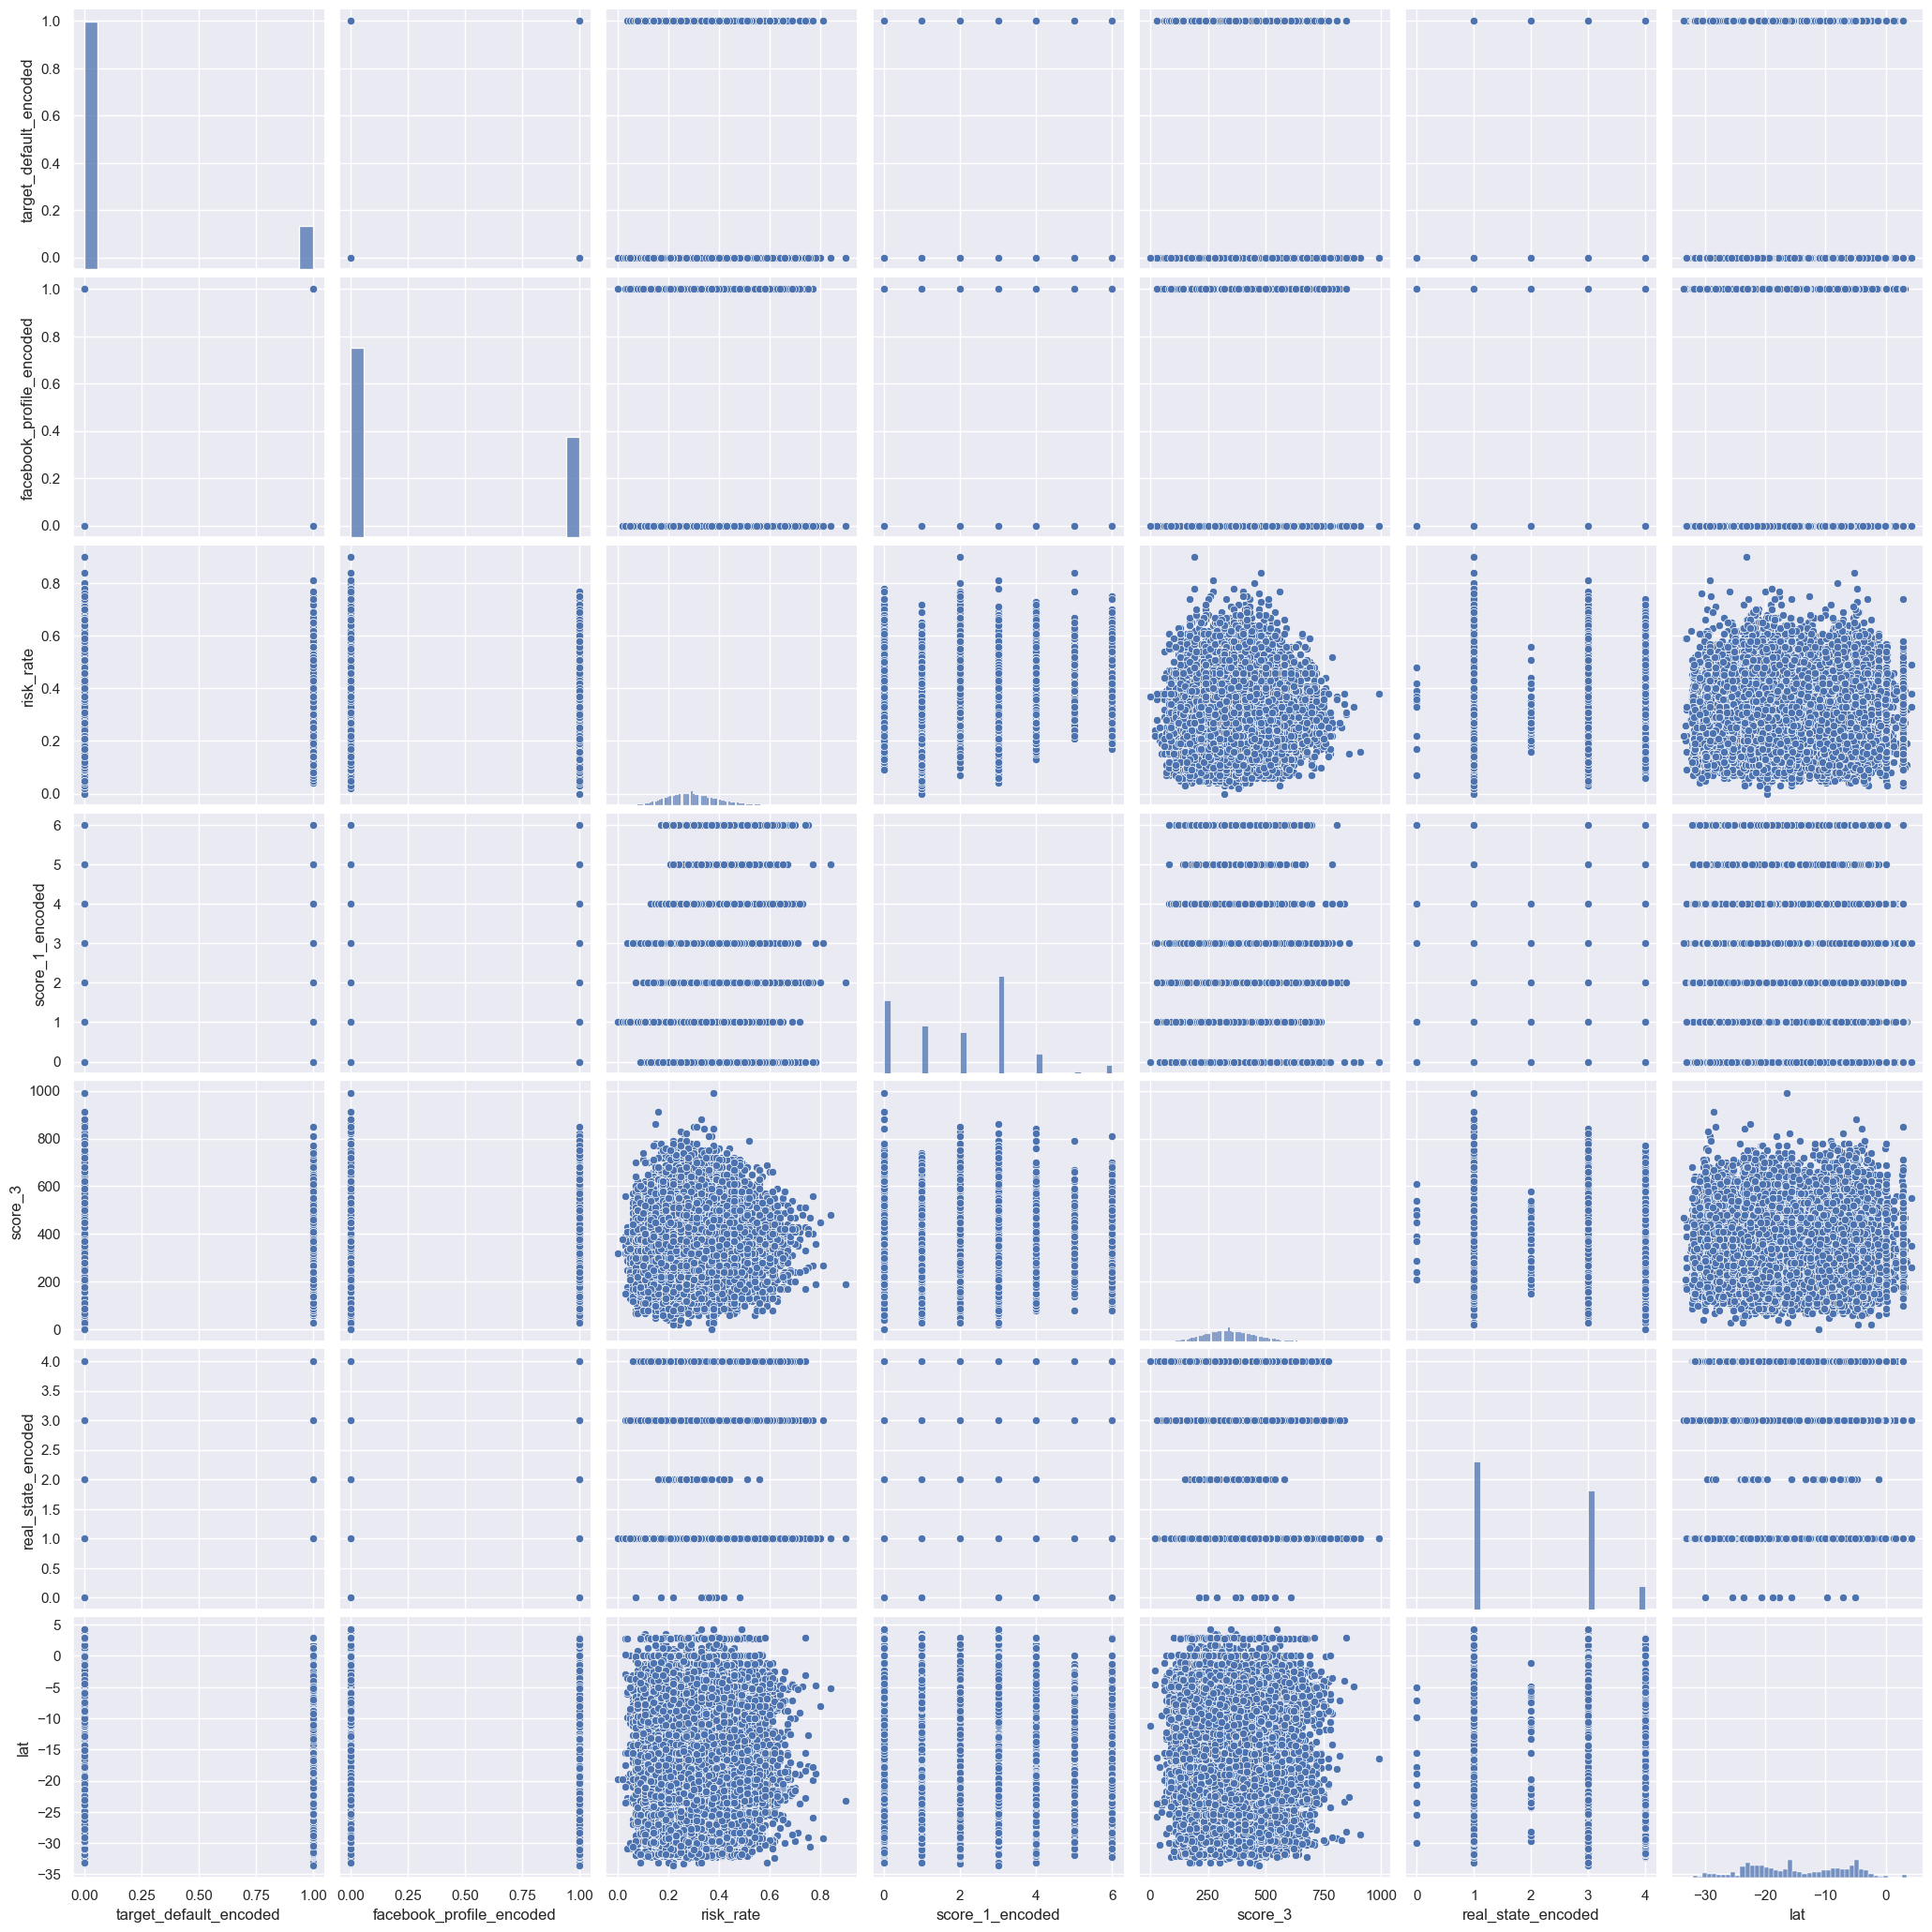

In [41]:
# Creating a pairplot between the top 7 features with the highest correlation with the other variables
sns.set()
features = ['target_default_encoded', 'facebook_profile_encoded', 'risk_rate', 'score_1_encoded', 'score_3', 'real_state_encoded','lat'];
sns.pairplot(df_encoded[features], height = 4, size=(3));
plt.show();

#### Key point Takeaways from the pair plot figure above;

* There is no clear or distinct relationship between most of the features.
* The features appear to be categorical, which could explain the lack of apparent relationships.
* Notable relationships are observed between the risk rates and credit scores, which intuitively makes sense as higher credit scores are positively correlated with lower risk rates.

Now, let's examine the histograms of the features to gain further insights into their distributions.







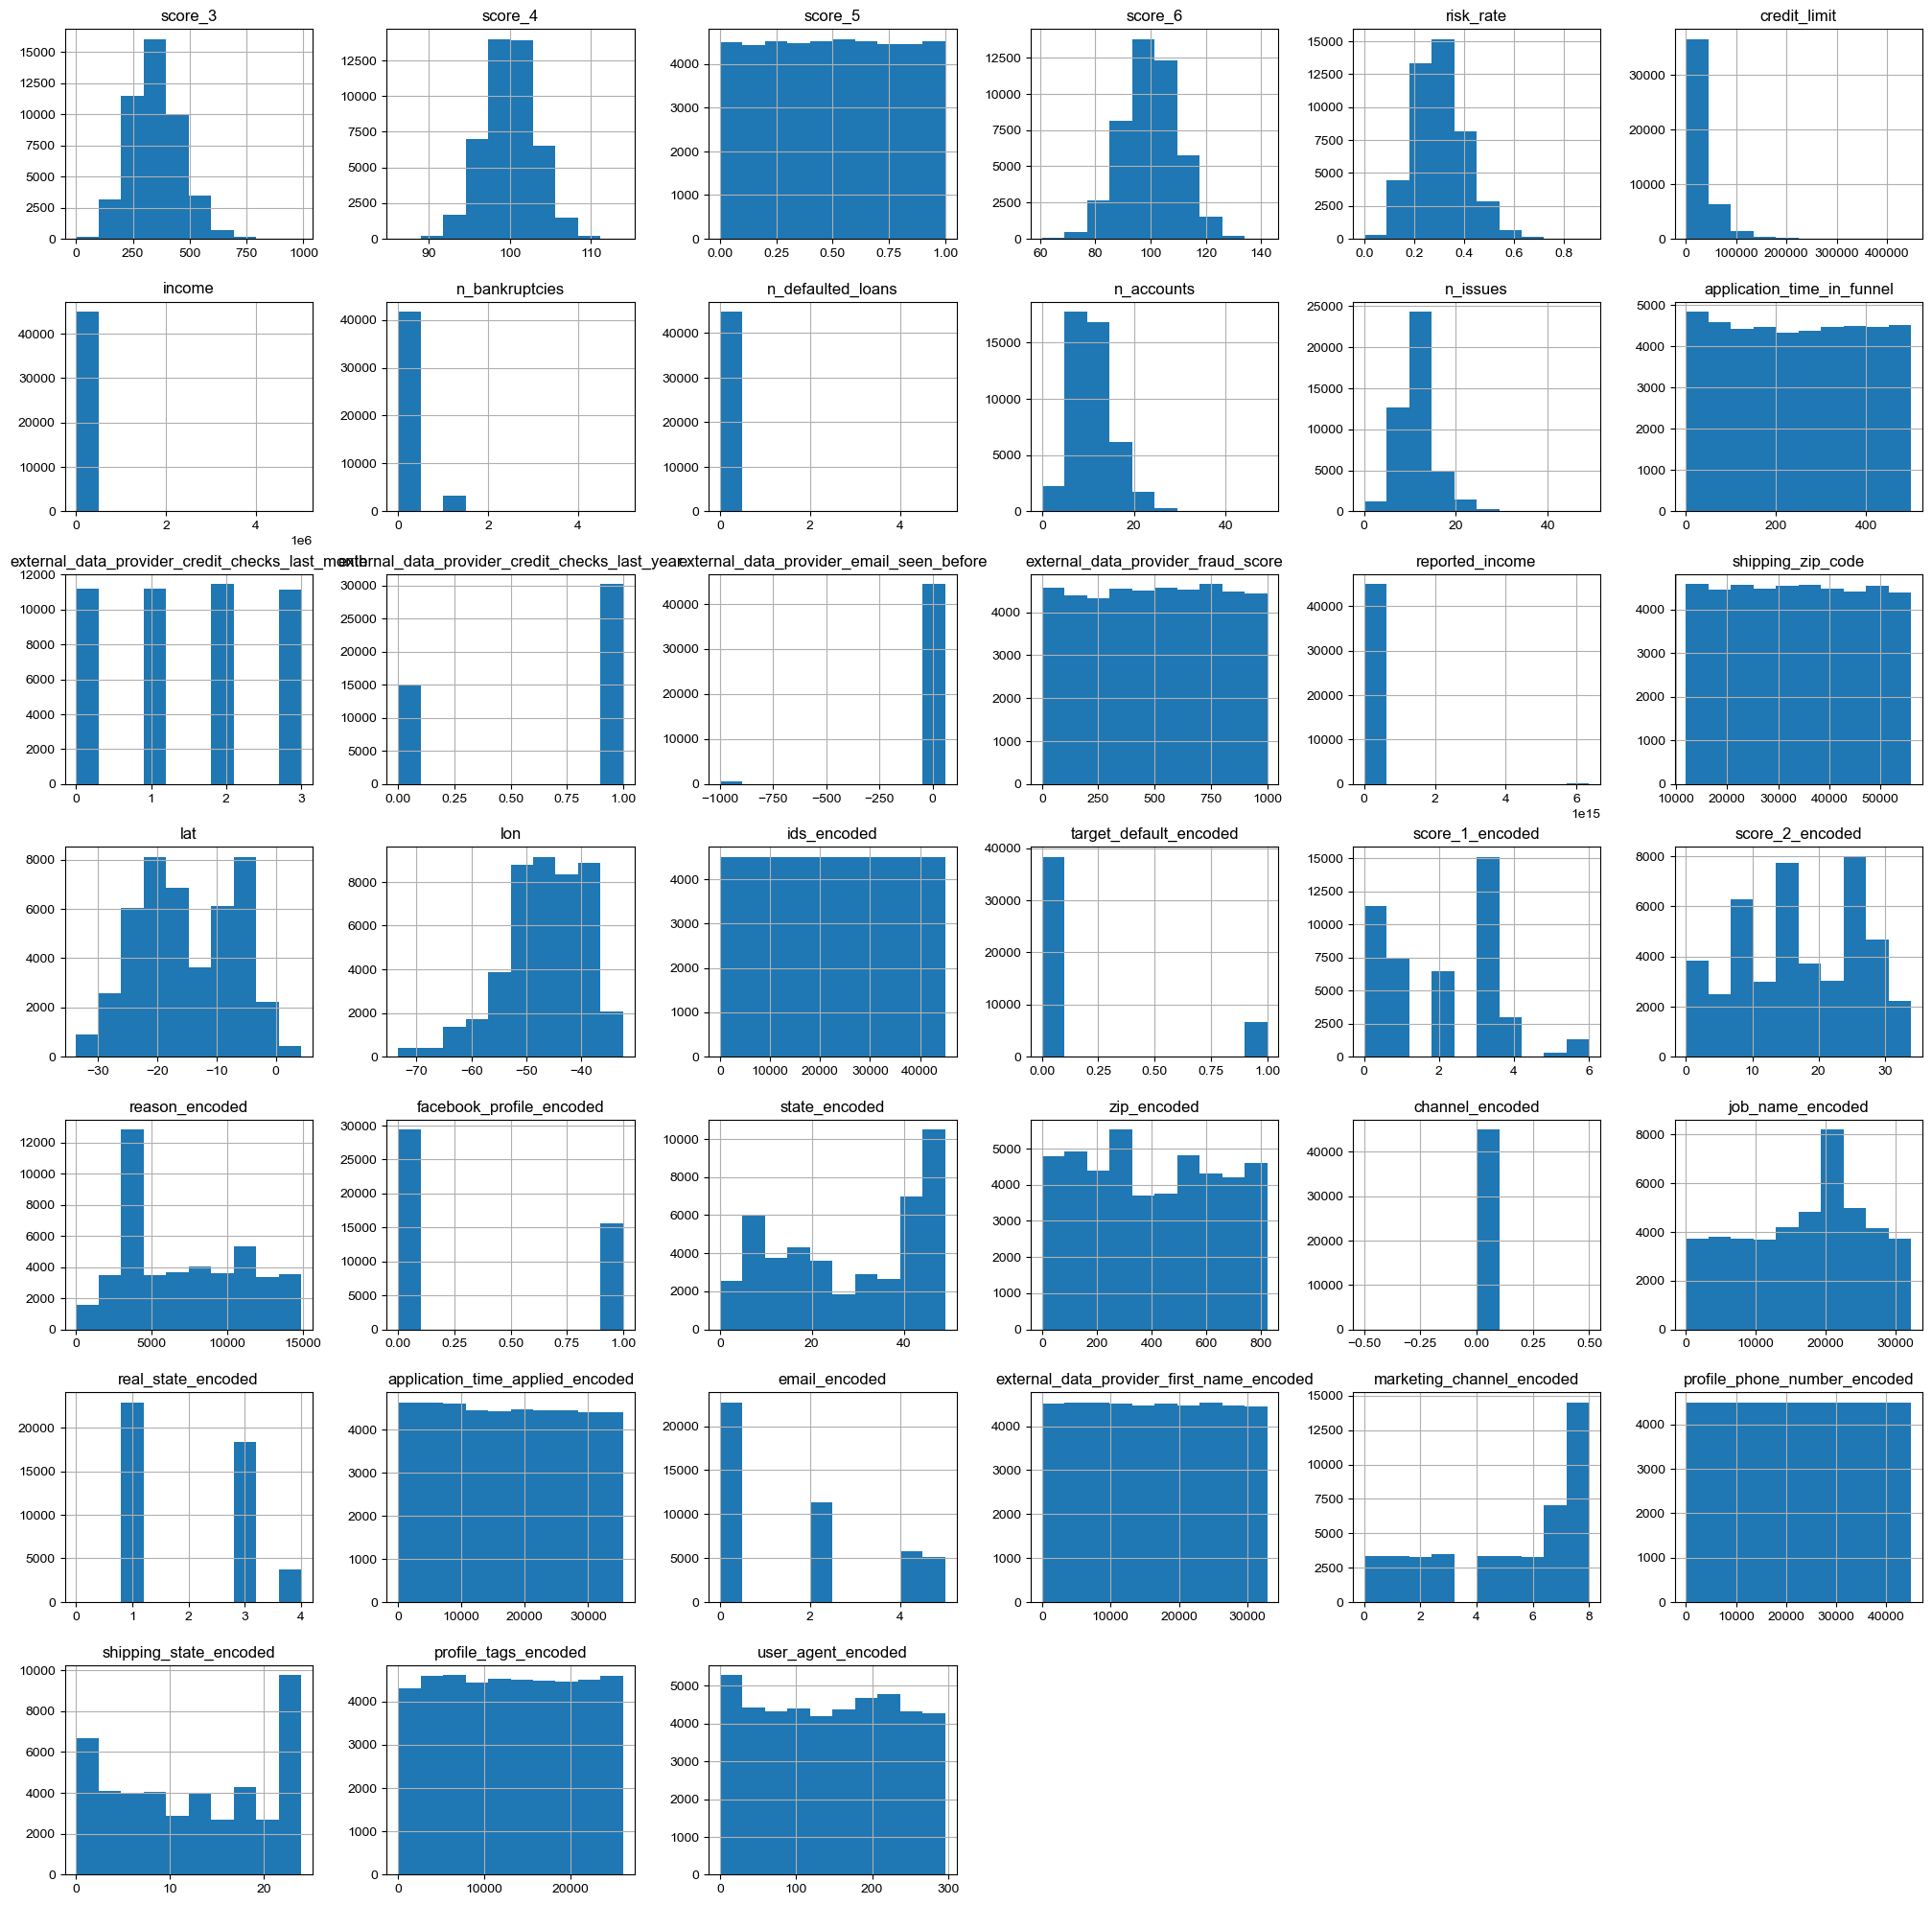

In [31]:
# plotting histograms
df_encoded.hist(figsize=(25,25));
sns.set()

At the outset, it is evident that some features in the dataset exhibit certain issues. These include:

* Presence of Outliers: Notably in the 'income' and 'credit_limit' features.
* Skewness: Observed in several features, indicating asymmetric distributions.
* High Frequency of Zero Values: Found in certain features, reflecting the non-occurrence of specific events.

These issues will be addressed in the analysis below.

In [32]:
# Log trasforming the positive and negative skewed data.
columns_to_log_transform = ['n_issues', 'credit_limit', 'income', 'lon','n_accounts']

# Apply log transformation
for col in columns_to_log_transform:
    df_encoded[col + '_log'] = np.log1p(df_encoded[col])
    df_encoded.drop(col, axis=1, inplace=True)

/Users/kenna/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


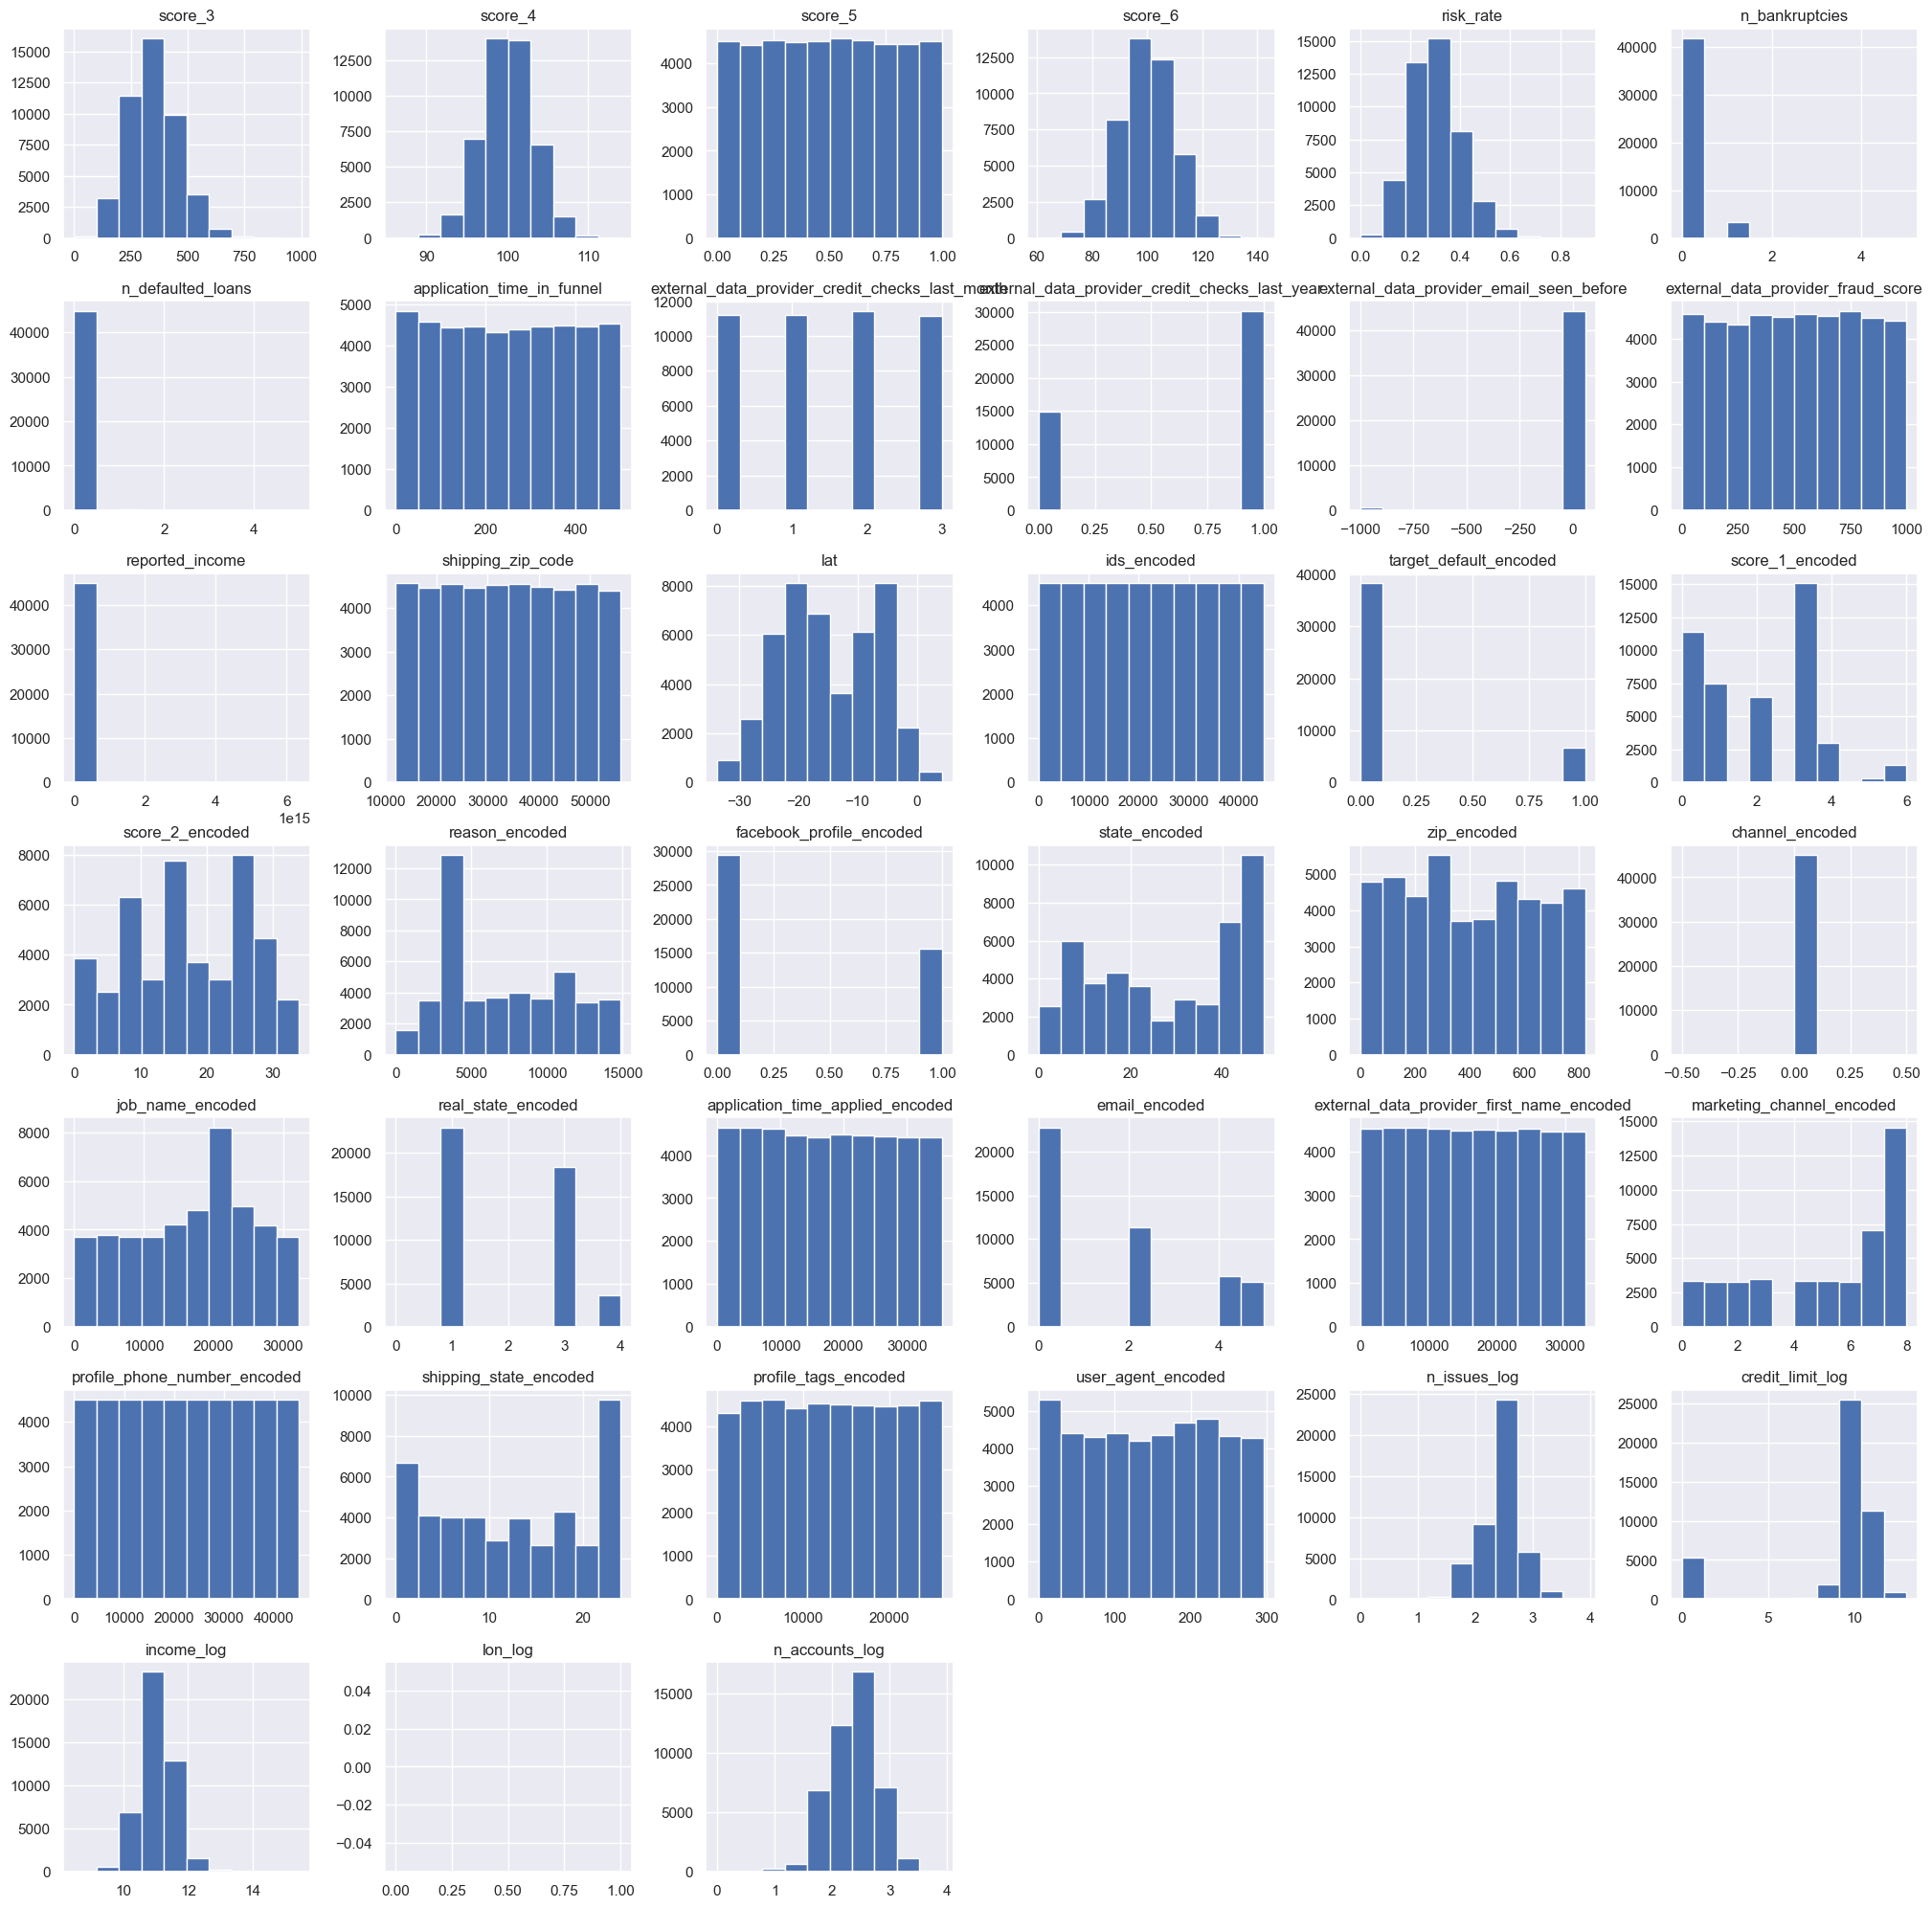

In [33]:
df_encoded.hist(figsize=(25,25));
sns.set()

The skewness of the data have now been accounted for. The features with outliers and high occuring zero values would be analyzed and accounted for in modelling.

To analyze the relationships between key features, we will start by examining the correlation between credit limit and income, as these features are expected to have an intuitive correlation:

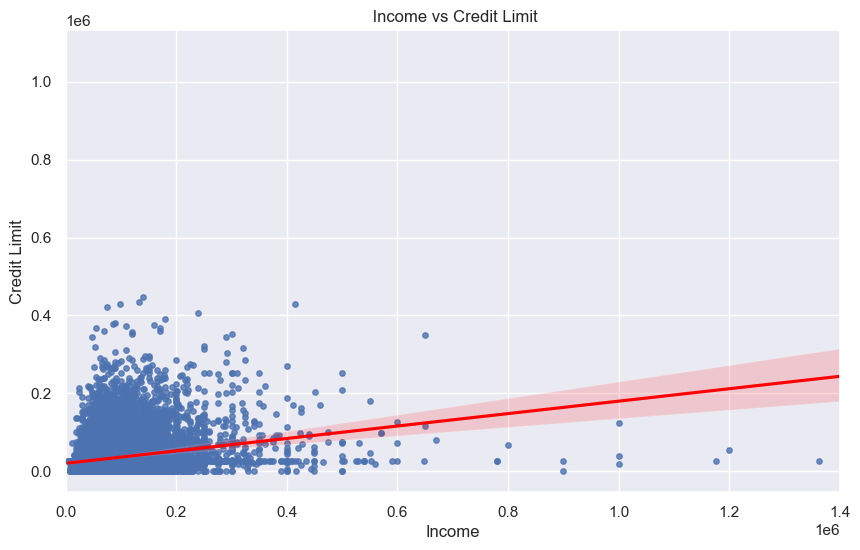

In [34]:
#Plotting a scatter graph to visualize the relationship between the Income and Credit Limit features logarithmic transformation
fig, ax = plt.subplots(figsize=(10, 6))

# Set x-axis limits
ax.set_xlim(-1000, 1400000)

# Creating the plot with the existing variables
sns.regplot(x='income', y='credit_limit', scatter_kws={"s": 15},
            line_kws={"color": "red"}, data=MainWdf, ax=ax)

# Adding labels and title
ax.set_xlabel('Income')
ax.set_ylabel('Credit Limit')
ax.set_title('Income vs Credit Limit')

# Display the plot
plt.show()


It's interesting to observe that income does not significantly impact the credit limit, as a higher income does not necessarily equate to a higher credit limit.

Next, let's analyze the relationship between credit limit and the number of defaulted loans, as well as reported income.

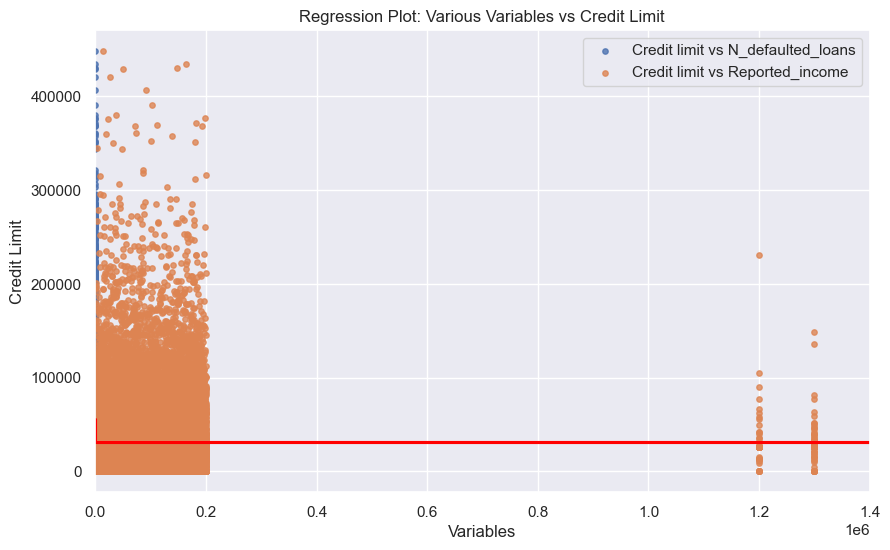

In [42]:
#Plotting scatter graphs to depict the relationship between the Credit Limit and the reported_income and the number of defaulted loans
variables_to_plot = ['n_defaulted_loans', 'reported_income']  # Add more variables as needed

# Create a figure and axis with specific size
fig, ax = plt.subplots(figsize=(10, 6))

# Setting x-axis limits
ax.set_xlim(-1000, 1400000)

# Plotting regression plots for each variable
for var in variables_to_plot:
    sns.regplot(x=var, y='credit_limit', scatter_kws={"s": 15},
                line_kws={"color": "red"}, data=MainWdf, ax=ax, label=f'Credit limit vs {var.capitalize()}')

# Adding labels and titles
ax.set_xlabel('Variables')
ax.set_ylabel('Credit Limit')
ax.set_title('Regression Plot: Various Variables vs Credit Limit')
ax.legend()

# Displaying the plot
plt.show()

In [45]:
column_name = 'n_defaulted_loans'

# Display counts of unique values for the specified column
percentage_counts = MainWdf[column_name].value_counts(normalize=True) * 100
print(f"Column '{column_name}' has the following percentage counts for each unique value:\n{percentage_counts}")

Column 'n_defaulted_loans' has the following percentage counts for each unique value:
n_defaulted_loans
0.0    99.613333
1.0     0.337778
2.0     0.037778
3.0     0.008889
5.0     0.002222
Name: proportion, dtype: float64


From the figure above it is seen that the Reported income doesnt really affect the credit limit as well just as the income does not. 

It is also seen that the number of defaulted loans has little to no affect on the credit limit as well as most of the defaulted loans are seen to be about 99% of the feature so that feature would be dropped.

#### *Conclusions from Exploratory Data Analysis*

The takeaway point from the Preliminary Data Analysis would be seen that:


* The preliminary data analysis reveals weak correlations between the target variables and other features.
* Many features exhibit low correlations with the target variables.
* There is an unbalanced class distribution as almost 90% of the data is 
* Some features, such as social media tags and latitude, show unexpectedly high correlations with the dependent variables.
* Existing independent features exhibit irregularities that need to be addressed.
* Surprisingly, certain variables appear as the most correlated ones.
* The number of defaulted previous loans significantly influences the credit limit.
* Higher reported and regular incomes do not necessarily lead to higher credit limits.
* The variable "Number of issues" appears important, but its exact influence remains unclear without a deeper understanding of its definition and impact.








#### 2. Machine Learning Models

We will proceed to build models using the data for thorough analysis and prediction.

In [173]:
#Making a copy of the Original Dataset
df_wnum = MainWdf.copy()

#Dropping the feature: n_defaulted_loans as mentioned in the EDA
df_wnum.drop('n_defaulted_loans',axis=1)



# normalizing the numerical columns
numerical_columns = df_wnum.drop('target_default',
                         axis=1).select_dtypes(exclude='object').columns

#Scaling the numerical columns
df_wnum[numerical_columns] = StandardScaler().fit_transform(df_wnum[numerical_columns].values)

In [174]:
#Making a copy of the previous set for encoding the categorical columns
encoded_df = df_wnum.copy()

#extracting the categorical columns
categorical_columns = df_wnum.select_dtypes('object').columns

# codifying each categorical column
for i in categ_col:
  encoded_df[i+'_encoded'] = LabelEncoder().fit_transform(encoded_df[i])
  encoded_df.drop(i, axis=1, inplace=True)

In [175]:
# Separating the target variable from the other features
X = encoded_df.drop('target_default_encoded', axis=1).select_dtypes(exclude='object')
y = encoded_df['target_default_encoded']

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

# Using the Extra Trees Classifier method to determine the importances of each feature on the Target feature
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)

[0.0290253  0.02872985 0.02914402 0.02838829 0.03196067 0.02728252
 0.0277374  0.01034964 0.00148517 0.0273988  0.02743799 0.03106131
 0.02553168 0.01706916 0.0302387  0.02824109 0.00148684 0.03040322
 0.03598842 0.03860559 0.02846503 0.03730605 0.02977799 0.02916212
 0.0190344  0.02885388 0.02895327 0.         0.03029725 0.01777521
 0.03341823 0.02265902 0.02944051 0.02635683 0.0438085  0.02835187
 0.03034965 0.02842452]


From the feature importances shown above we can see what features contribute most to the target variable. We would go on to then select a dataset that has the 20 most features with the highest importances.

In [176]:
# Creating a dataframe containing the list of the features and their corresponding importances
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={"index": "features"}, inplace=True)

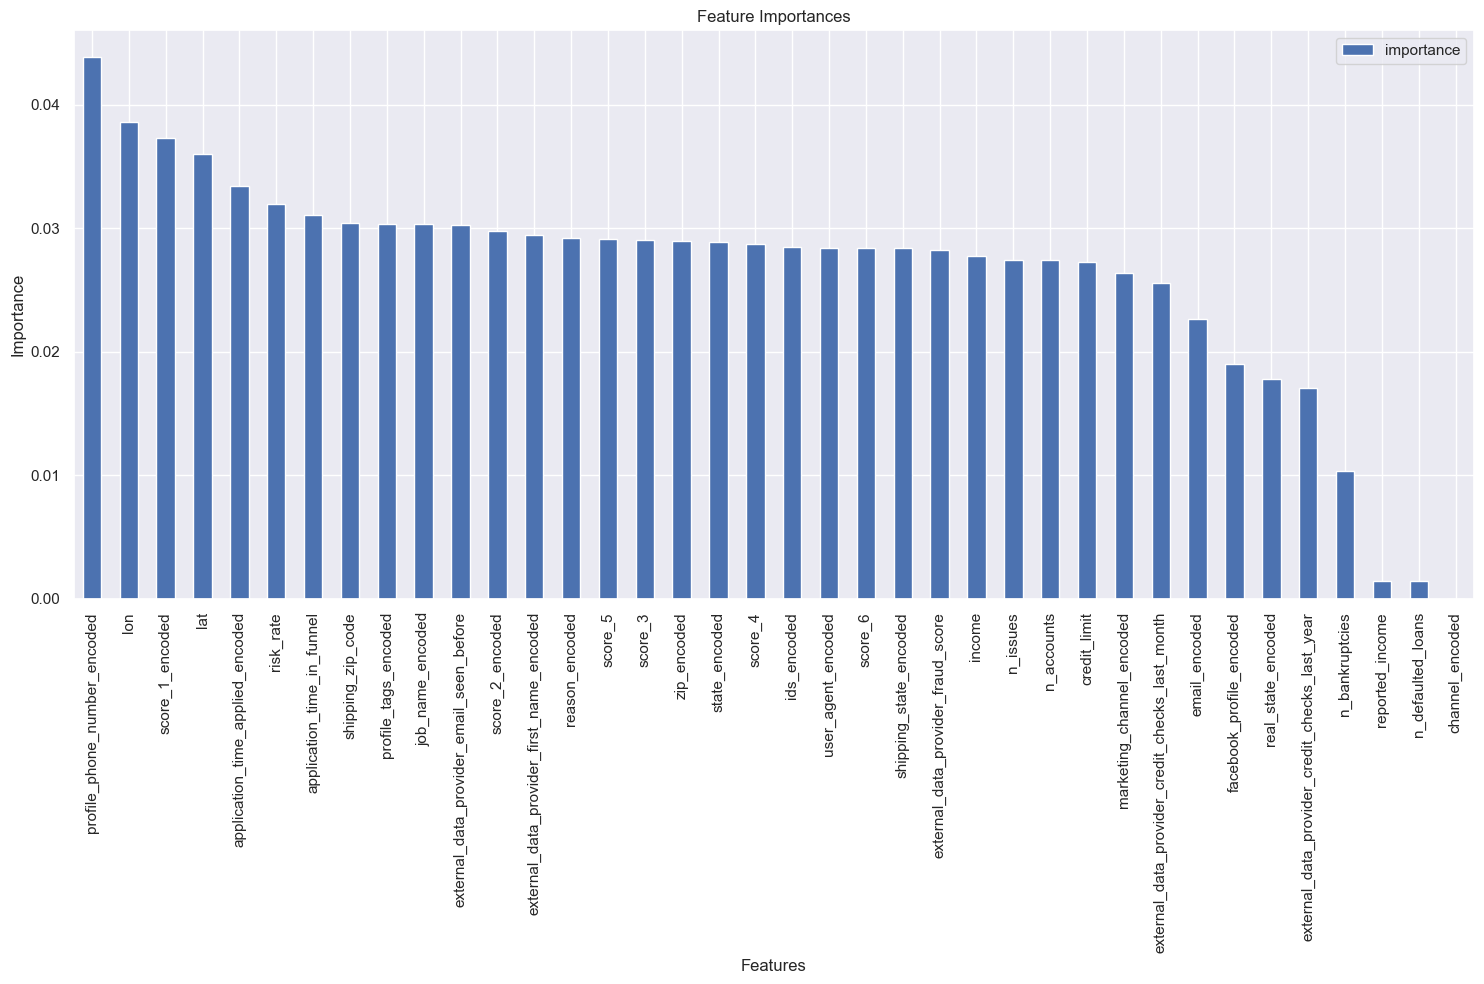

In [177]:
#Plotting the importances vs the features for each dataframe
fig, ax = plt.subplots(figsize=(15,10))

feature_importances.plot(x="features", y="importance", kind="bar", ax=ax)

ax.set_title("Feature Importances")
ax.set_xlabel("Features")
ax.set_ylabel("Importance")

plt.savefig("feat_imp.png")
plt.tight_layout()

In [178]:
feature_importances['features']

0                        profile_phone_number_encoded
1                                                 lon
2                                     score_1_encoded
3                                                 lat
4                    application_time_applied_encoded
5                                           risk_rate
6                          application_time_in_funnel
7                                   shipping_zip_code
8                                profile_tags_encoded
9                                    job_name_encoded
10           external_data_provider_email_seen_before
11                                    score_2_encoded
12          external_data_provider_first_name_encoded
13                                     reason_encoded
14                                            score_5
15                                            score_3
16                                        zip_encoded
17                                      state_encoded
18                          

In [179]:
# Creating a dataset with the 20 most features with the highest importances.
df_ml = encoded_df[['profile_phone_number_encoded','lon',
                     'score_1_encoded', 'lat',
                     'application_time_applied_encoded', 'risk_rate',
                      'score_2_encoded','score_3','application_time_in_funnel','profile_tags_encoded','external_data_provider_first_name_encoded',
                     'score_4','zip_encoded','score_5','reason_encoded','external_data_provider_email_seen_before','shipping_zip_code', 'ids_encoded','external_data_provider_fraud_score','user_agent_encoded']]

df_ml['target_default'] = encoded_df['target_default_encoded']

/var/folders/b4/npvx3rxj7t175zsy6xbc7lwc0000gn/T/ipykernel_1448/3496631285.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['target_default'] = encoded_df['target_default_encoded']


In [183]:
# Creating the test and train datasets based on the new dataset created
from sklearn.model_selection import train_test_split

# separating the target variable from the others
X = df_ml.drop('target_default', axis=1).select_dtypes(exclude='object')
y = df_ml['target_default']

# splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

To mitigate class imbalance observed in the EDA section, we employ random undersampling to achieve a balanced class distribution. Subsequently, we visually examine the distribution of the sampled data.


target_default
0    4663
1    4663
Name: count, dtype: int64


<Axes: xlabel='target', ylabel='count'>

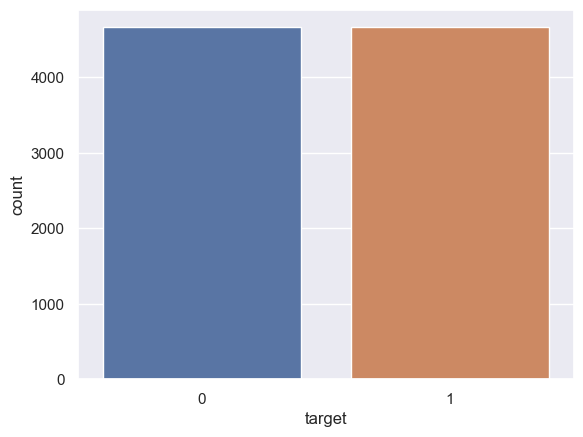

In [197]:
from imblearn.under_sampling import RandomUnderSampler

# Undersampling the present data
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Detecting the distribution between the two default classes
print(pd.Series(y_rus).value_counts())

# Plotting the new class distributions
y_rus_named = pd.Series(y_rus, name='target')

# Plot the distribution of classes using seaborn
sns.countplot(x=y_rus_named)

In [193]:
def val_model(X, y, clf, quite=False):
    """
    This function performs cross-validation with training data for a given model.

 
     X: DataFrame, contains independent variables.
     y: Series, vector containing the target variable.
     clf: The Scikit-learn classifier model.
     quite: bool, indicating whether the function should print the results or not.

     #Returns: The float average of closs-validation scores.
    """
    
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if quite == False:
        print("Recall: {:.4f} (+/- {:.2f})".format(scores.mean(), scores.std()))
    
    return scores.mean()

# create Baseline model to view the performance
rf = RandomForestClassifier()
score_baseline = val_model(X_rus, y_rus, rf)

Recall: 0.5595 (+/- 0.02)


The function described above is designed to evaluate recall scores for different machine learning models. These scores reflect how well each model identifies all true positives of a target default variable. We'll use this function to analyze how the following models perform with the dataset on these models :

* Random Forest Classifier
* Decision Tree Classifier
* SGD Classifier
* Logistic Regression Classifier
* XGB Classifier
* LGBM Classifier

This evaluation will provide insights into how effectively each model can correctly identify instances of the target variable, assessing their overall performance in this specific context

In [205]:
# Instantiating the models
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

model = []
recall = []
# Evaluating the Performance
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train, y_train, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['recall'])

[LightGBM] [Info] Number of positive: 3730, number of negative: 21470
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004795 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4074
[LightGBM] [Info] Number of data points in the train set: 25200, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148016 -> initscore=-1.750248
[LightGBM] [Info] Start training from score -1.750248
[LightGBM] [Info] Number of positive: 3730, number of negative: 21470
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003548 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4073
[LightGBM] [Info] Number of data points in the train set: 25200, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148016 -> initscore=-1.750248
[LightGBM] [Info] Start training from score -1.750248
[LightGBM] [In

,recall
RandomForestClassifier,0.096292
DecisionTreeClassifier,0.261855
SGDClassifier,0.000000
SVC,0.000000
LogisticRegression,0.000000
XGBClassifier,0.149473
LGBMClassifier,0.144327


In [206]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

After evaluating different modeling techniques to determine their performance scores, we would select the Decision Tree classifier, which achieved the highest score. Next, we would refine its settings using grid search to find the optimal configuration:

In [220]:
dt = DecisionTreeClassifier(random_state=36)

# Defining the parameters to be tested
param_grid = {
  'max_depth': [4, 10, 15],  
  'ccp_alpha':[0.0, 0.5, 1.0],
  'criterion':['gini', 'entropy'],
  'max_depth': [1, 5, 10]
 }

# Identifying the best parameters with the preset amount of splits
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(dt, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus, y_rus)

# Priniting out the results
print("Melhor: {:.2f} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.60 para {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 5}


In [213]:
#Creating the model based on the results shown in the grid search conducted above
ml_model = DecisionTreeClassifier(ccp_alpha=0.0, max_depth=5, criterion='gini',
                         random_state=36)

ml_model.fit(X_rus, y_rus)

DecisionTreeClassifier(max_depth=5, random_state=36)

Given the dataset's imbalance, the metrics generated may not accurately reflect that of the real world. Now, let's proceed to assess the model's accuracy as a straightforward evaluation metric.

Classification Report:
               precision    recall  f1-score   support

           0     0.9024    0.6896    0.7818     11502
           1     0.2420    0.5706    0.3399      1998

    accuracy                         0.6720     13500
   macro avg     0.5722    0.6301    0.5608     13500
weighted avg     0.8047    0.6720    0.7164     13500

Accuracy Score:	 0.6720

ROC_AUC:	 0.6301



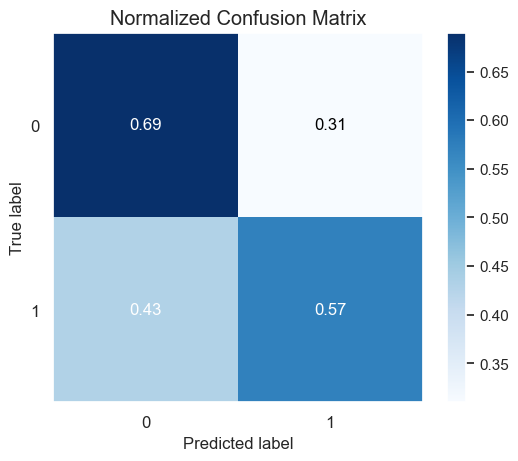

In [218]:
# predictions and probabilities on the test dataset
y_pred = ml_model.predict(X_test)

# checking the performance of the algorithm
# classification report
print('Classification Report:\n', classification_report(y_test,y_pred, digits=4))

# accuracy
print('Accuracy Score:\t {:.4f}\n'.format(accuracy_score(y_test,y_pred)))

# AUC
print('ROC_AUC:\t {:.4f}\n'.format(roc_auc_score(y_test, y_pred)))

# confusion matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred, normalize=True);


### 3. Conclusion and Findings

#### Performance Report

From the classifiaction results shown above this is what we can depict from our model been created:

* Class 0 has higher precision and accuracy but lower recall, indicating that while the model correctly identifies negatives most of the time, it misses some actual negatives.
* Class 1 has lower precision but higher recall, suggesting that the model identifies positives more comprehensively but also incorrectly labels some negatives as positives.
* The macro average gives equal weight to both classes, while the weighted average considers the support (number of instances) for each class.

It is then seen that our model would be more accurate on predicting the non credit defaults on the dataset with a score of **69%** as compared to predicting accurately the credit defaults with a value of **57%**.

Among the models tested, the Decision Tree Classifier emerges as the optimal choice based on the dataset's metrics.

Our model could be enhanced through various adjustments such as exploring different encoding techniques, experimenting with alternative data balancing methods, and engaging in feature engineering. These steps underscore the complexity of the problem and highlight the substantial effort required to achieve optimal performance.

While we have surpassed our initial baseline and achieved satisfactory results for this project, there is still considerable room for improvement. Our model occasionally approves credit for individuals who may not qualify while also rejecting deserving applicants. This underscores the ongoing challenge of achieving a more accurate and fair credit decision process